In [1]:
pip install pandas matplotlib seaborn openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Excel file
file_path = 'BMW_Operations.xlsx'
sales_df = pd.read_excel(file_path, sheet_name='Sales_Data')
service_df = pd.read_excel(file_path, sheet_name='Service_Data')
feedback_df = pd.read_excel(file_path, sheet_name='Customer_Feedback')

In [4]:
# --- Sales Analysis ---
print("Top 5 Sales Records:")
print(sales_df.head())

Top 5 Sales Records:
   Year         Region    Country         Model  Units_Sold  Unit_Price (EUR)  \
0  2024           Asia      India  BMW 5 Series        2325             54005   
1  2022         Europe     France        BMW iX        1982             64329   
2  2023  North America     Mexico        BMW X3        4870             66400   
3  2024  North America     Canada        BMW X5        3511             65550   
4  2023  South America  Argentina        BMW X5        2961             53931   

   Revenue (EUR)  
0      125561625  
1      127500078  
2      323368000  
3      230146050  
4      159689691  


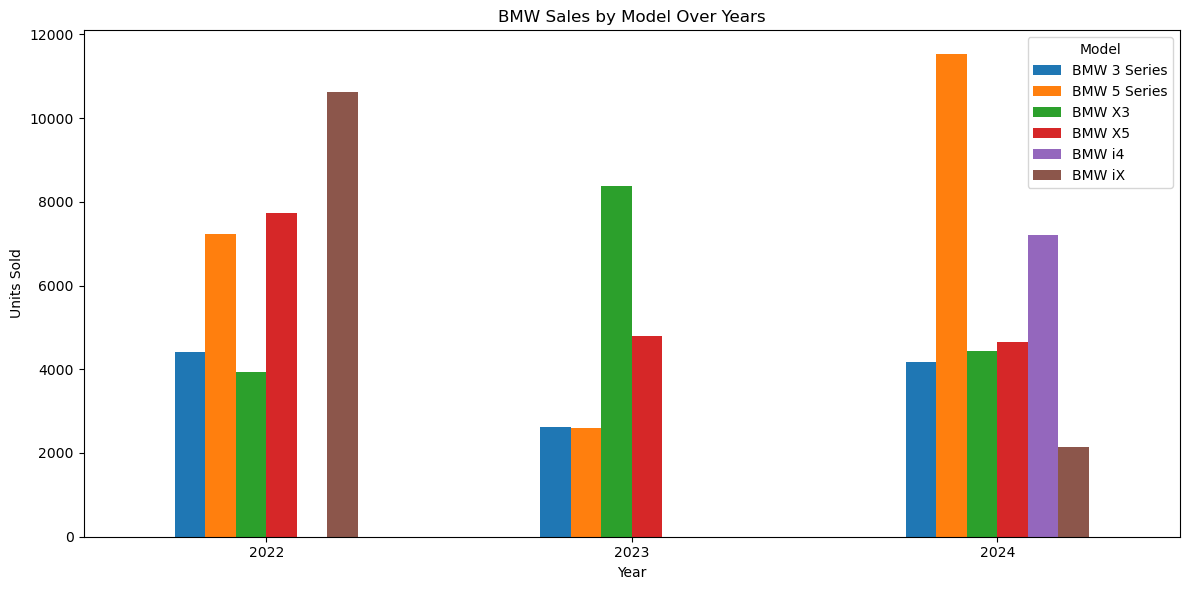

In [5]:
# Group by Year and Model
sales_by_model = sales_df.groupby(['Year', 'Model'])['Units_Sold'].sum().unstack().fillna(0)
sales_by_model.plot(kind='bar', figsize=(12, 6))
plt.title('BMW Sales by Model Over Years')
plt.ylabel('Units Sold')
plt.xticks(rotation=0)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

In [6]:
# --- Service Analysis ---
avg_service = service_df.groupby('Region')['Avg_Service_Time (days)'].mean()
satisfaction = service_df.groupby('Region')['Satisfaction_Rating (out of 5)'].mean()

service_summary = pd.DataFrame({
    'Avg_Service_Time': avg_service,
    'Avg_Satisfaction': satisfaction
})

In [7]:
print("\nService Summary by Region:")
print(service_summary)


Service Summary by Region:
               Avg_Service_Time  Avg_Satisfaction
Region                                           
Asia                   3.244444          4.022222
Europe                 4.080000          3.700000
North America          3.220000          4.100000
South America          3.300000          4.163636


In [8]:
# --- Customer Feedback Analysis ---
ratings = feedback_df.groupby('Model')['Rating (out of 5)'].mean().sort_values(ascending=False)
print("\nAverage Customer Ratings by Model:")
print(ratings)


Average Customer Ratings by Model:
Model
BMW 5 Series    4.666667
BMW 3 Series    4.000000
BMW X3          4.000000
BMW X5          3.875000
BMW iX          3.666667
BMW i4          3.500000
Name: Rating (out of 5), dtype: float64


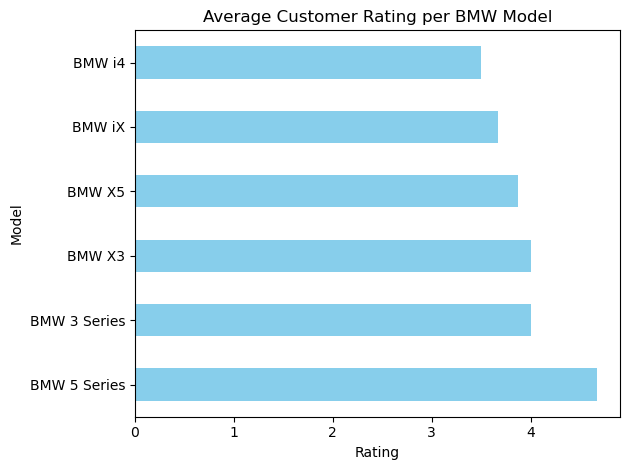

In [9]:
ratings.plot(kind='barh', color='skyblue')
plt.title('Average Customer Rating per BMW Model')
plt.xlabel('Rating')
plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

In [11]:
# Prepare data
X = sales_df[['Year', 'Region', 'Country', 'Model', 'Unit_Price (EUR)']]
y = sales_df['Units_Sold']

In [12]:
# Encode categorical variables
X_encoded = pd.get_dummies(X)

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [14]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Predict
y_pred = model.predict(X_test)

In [16]:
# Evaluation
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

R² Score: -0.97
RMSE: 1601.85
